# <p align="center">Society of Hispanic Professional Engineers: Financial Mastersheet Logistics</p>

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
from dateutil.parser import parse

In [169]:
input_filename = "expenses.csv"

committees = set()  

with open(input_filename, mode='r') as infile:
    reader = csv.DictReader(infile)
    for row in reader:
        committees.add(row['Commitee'])

for committee in sorted(committees):  
    print(committee)

Academic Affairs
Alumni
Community Service
Eboard
External
Grad Ambassador
HSO
HSV
Internal
Membershpe
Nationals
Noche De Ciencias
Pen Pals
President
Publicity
RT Fund 23-24
Secretary
Student Advisor
Tech Chair
Treasurer


In [170]:
input_filename = input("Enter the name of the file you would like to analyze: ")

df = pd.read_csv(input_filename)

fall_budget = 0
spring_budget = 0

in_fall_events = False
in_spring_events = False

for index, row in df.iterrows():
    event_source = row['Event/Source']
    estimated_expenses = row['Estimated Expenses']
    
    if pd.notna(event_source):
        if 'Fall Events' in event_source:
            in_fall_events = True
            in_spring_events = False
        elif 'Spring Events' in event_source:
            in_fall_events = False
            in_spring_events = True
    
    if in_fall_events and pd.notna(estimated_expenses):
        try:
            fall_budget += float(estimated_expenses.replace('$', '').replace(',', ''))
        except ValueError:
            continue
    
    if in_spring_events and pd.notna(estimated_expenses):
        try:
            spring_budget += float(estimated_expenses.replace('$', '').replace(',', ''))
        except ValueError:
            continue

print(f"Fall Budget: {fall_budget}")
print(f"Spring Budget: {spring_budget}")

Fall Budget: 1185.0
Spring Budget: 3180.0


In [171]:
import pandas as pd
from dateutil.parser import parse

expenses_filename = "expenses.csv"
input_filename = input("Enter the name of the file you would like to analyze: ")

expenses_df = pd.read_csv(expenses_filename)
budgets_df = pd.read_csv(budgets_filename)

def parse_date(date_str):
    try:
        return parse(str(date_str)).date()
    except (ValueError, TypeError):
        return None

expenses_df['Date Input'] = expenses_df['Date Input'].apply(parse_date)
expenses_df = expenses_df.dropna(subset=['Date Input'])

expenses_df['Total Cost'] = pd.to_numeric(expenses_df['Total Cost'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce').fillna(0)

expenses_df_sorted = expenses_df.sort_values(by='Date Input')

committee_totals = expenses_df_sorted.groupby('Commitee')['Total Cost'].sum().reset_index()
committee_totals.columns = ['Committee', 'Total Cost']

print("Sorted Expenses DataFrame:")
print(expenses_df_sorted)

print("\nTotal Cost for each committee:")
print(committee_totals)

committee_totals.to_csv('committee_totals.csv', index=False)

expenses_df_sorted['Commitee'] = expenses_df_sorted['Commitee'].str.strip().str.lower()

committee = input("Please enter the committee name: ").strip().lower()
committee_expenses = expenses_df_sorted[expenses_df_sorted['Commitee'] == committee]

print(f"\nFiltered expenses for committee '{committee}':")
print(committee_expenses)

fall_expenses = committee_expenses[(committee_expenses['Date Input'].apply(lambda x: x.month in range(8, 12)))]
spring_expenses = committee_expenses[(committee_expenses['Date Input'].apply(lambda x: x.month in range(1, 8)))]

print(f"\nFall expenses for committee '{committee}':")
print(fall_expenses)
print(f"\nSpring expenses for committee '{committee}':")
print(spring_expenses)

total_fall_expenses = fall_expenses['Total Cost'].sum()
total_spring_expenses = spring_expenses['Total Cost'].sum()

fall_difference = fall_budget - total_fall_expenses
spring_difference = spring_budget - total_spring_expenses

fall_status = "Underspent" if fall_difference >= 0 else "Overspent"
spring_status = "Underspent" if spring_difference >= 0 else "Overspent"

fall_large_purchases = fall_expenses[fall_expenses['Total Cost'] > 500]
spring_large_purchases = spring_expenses[spring_expenses['Total Cost'] > 500]

print(f"Committee: {committee}")

print("\nFall Semester:")
print(f"Total Expenses: {total_fall_expenses:.2f}")
print(f"Budget: {fall_budget:.2f}")
print(f"Difference: {fall_difference:.2f} ({fall_status})")
print("Large Purchases:")
for purchase in fall_large_purchases.itertuples():
    print(f"- Description: {purchase.Description}, Total Cost: {purchase._3:.2f}, Comments: {purchase.Comments}")

print("\nSpring Semester:")
print(f"Total Expenses: {total_spring_expenses:.2f}")
print(f"Budget: {spring_budget:.2f}")
print(f"Difference: {spring_difference:.2f} ({spring_status})")
print("Large Purchases:")
for purchase in spring_large_purchases.itertuples():
    print(f"- Description: {purchase.Description}, Total Cost: {purchase._3:.2f}, Comments: {purchase.Comments}")

Sorted Expenses DataFrame:
     Date Input                                        Description  \
0    2023-06-25                                       NILA Summits   
1    2023-07-11                               B2School Fundraiser    
2    2023-08-03                                           RT Merch   
3    2023-08-03                                           RT Merch   
4    2023-08-13                                       Welcome Week   
..          ...                                                ...   
240  2024-05-02                             Senior Gift Embroidery   
241  2024-05-02       30% down payment on white Sox alumni tickets   
242  2024-05-06  Pen Pals: Goodie Bags stuff, paper circuit stu...   
243  2024-05-12                                       SHPE x ALPFA   
244  2024-06-25                          White Sox Alumni Tailgate   

     Total Cost           Commitee  \
0        975.00             Eboard   
1        161.99          Treasurer   
2        866.73   

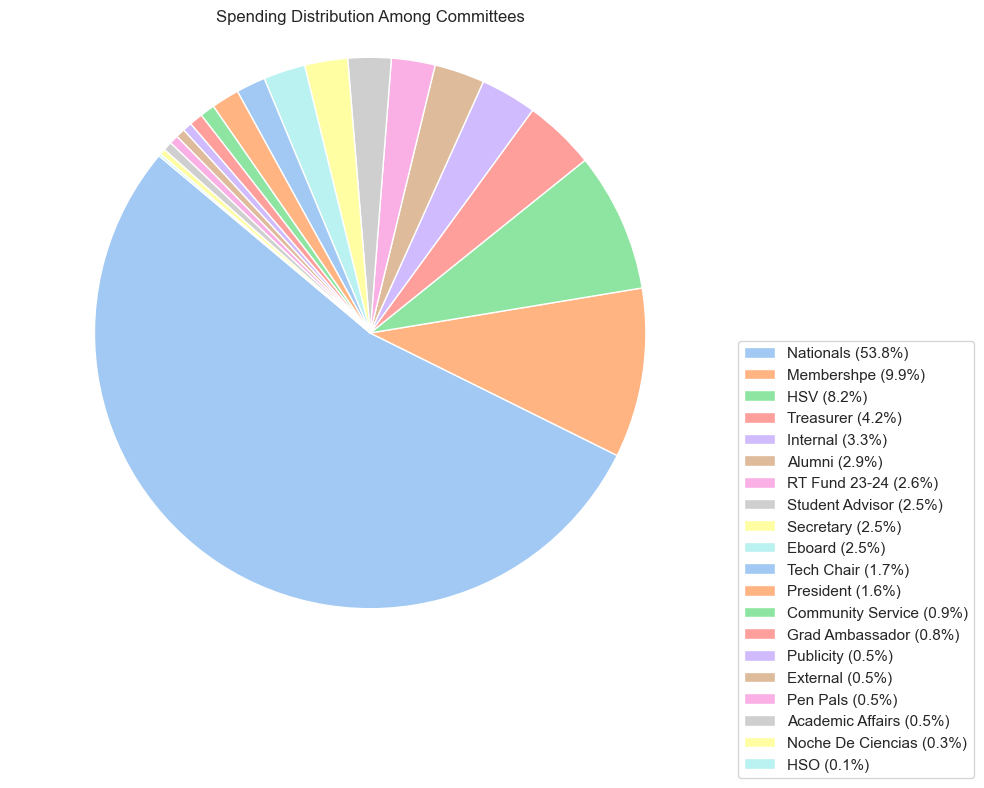

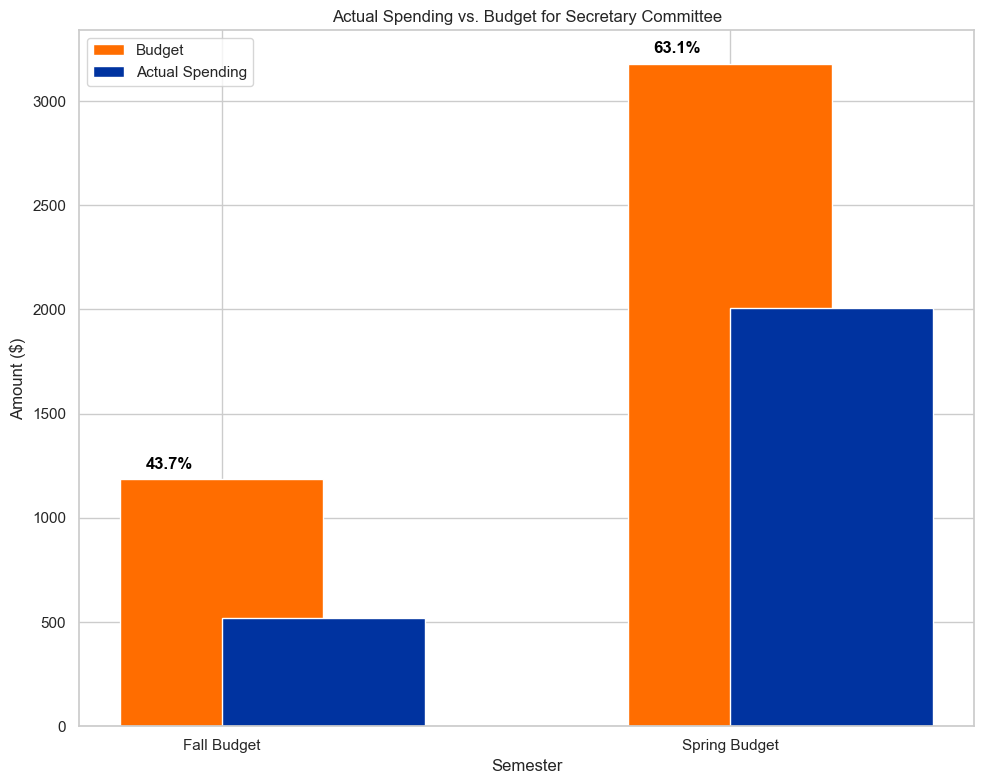

Committee: secretary

Fall Semester:
Total Expenses: 517.65
Budget: 1185.00
Difference: 667.35 (Underspent)
Large Purchases:

Spring Semester:
Total Expenses: 2005.01
Budget: 3180.00
Difference: 1174.99 (Underspent)
Large Purchases:
- Description: Shpetina, Total Cost: 544.06, Comments: Shpetina Month event supplies


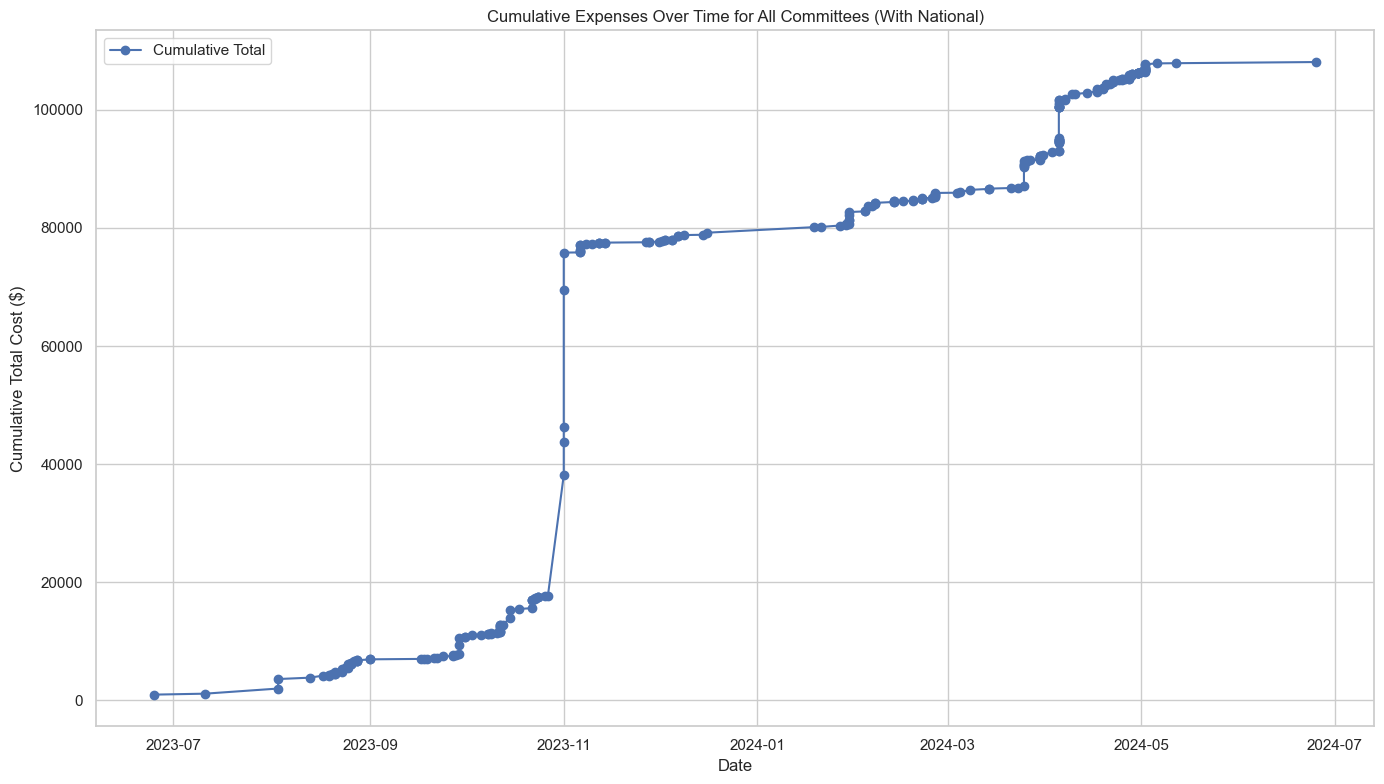

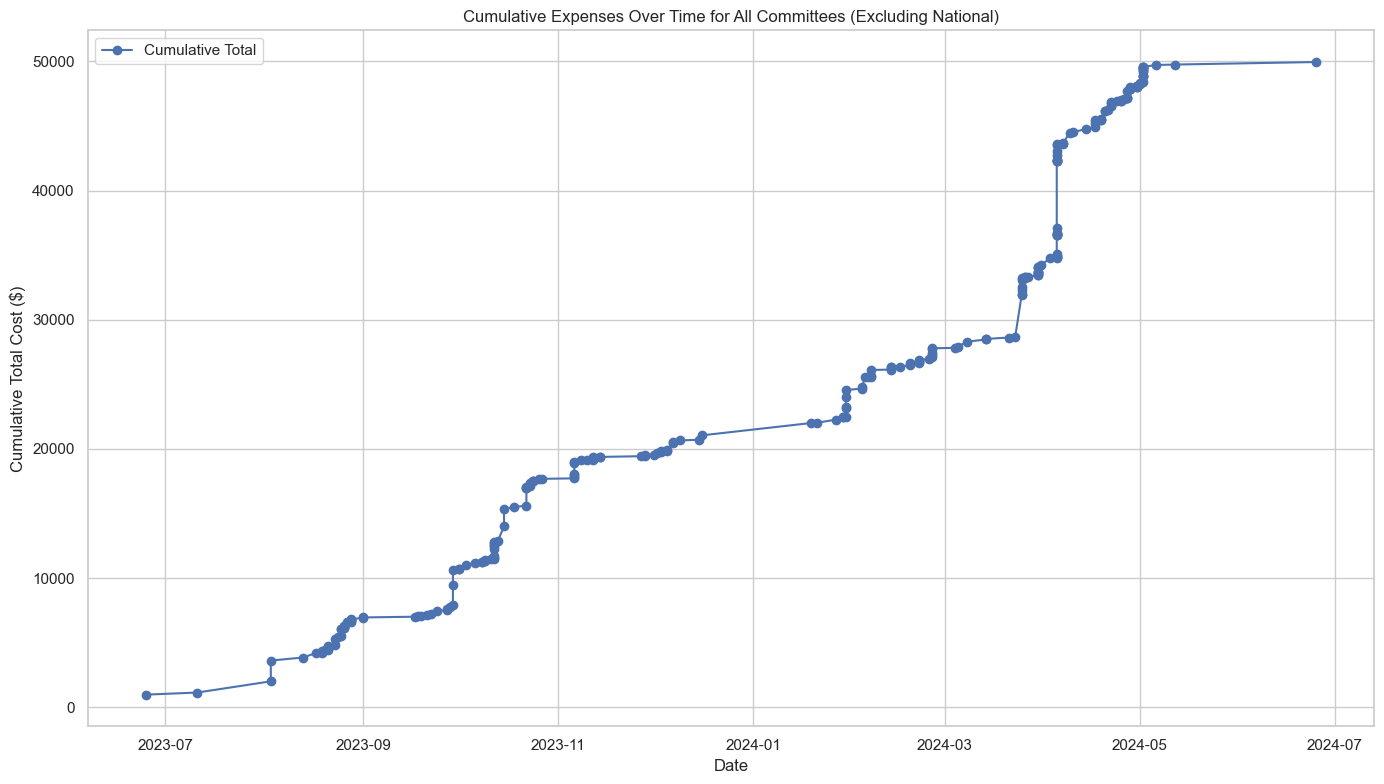

Areas with high derivatives:
Date: 2023-08-03, Change: 1609.35, Comment: RT Merch
Date: 2023-09-29, Change: 1500.00, Comment: Homecoming
Date: 2023-09-29, Change: 1217.20, Comment: Leadershpe polos
Date: 2023-10-15, Change: 1341.84, Comment: Rt fiesta fernandos and state of the chapter jj
Date: 2023-10-22, Change: 1343.00, Comment: Homecoming
Date: 2023-11-01, Change: 20431.00, Comment: Hotel
Date: 2023-11-01, Change: 5699.00, Comment: Alumni Dinner
Date: 2023-11-01, Change: 2437.00, Comment: Polos
Date: 2023-11-01, Change: 23265.00, Comment: Registration
Date: 2023-11-01, Change: 6300.00, Comment: Flight Stipend
Date: 2024-03-25, Change: 3207.96, Comment: Banquet
Date: 2024-04-05, Change: 1405.00, Comment: bus for SHPE and NSBE students
Date: 2024-04-05, Change: 5197.54, Comment: hotel stay for students and chaperones


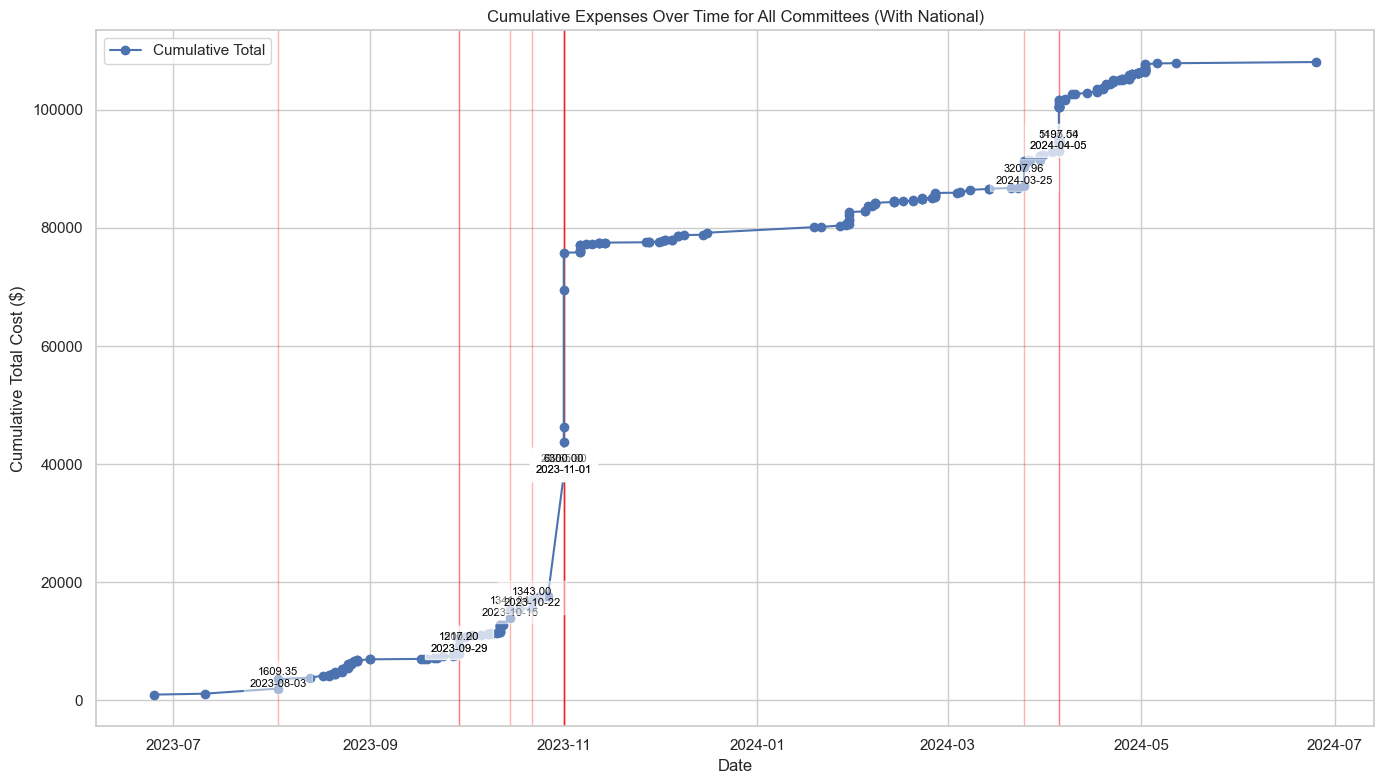

Areas with high derivatives:
Date: 2023-08-03, Change: 866.73, Comment: RT Merch
Date: 2023-08-03, Change: 1609.35, Comment: RT Merch
Date: 2023-09-29, Change: 1500.00, Comment: Homecoming
Date: 2023-09-29, Change: 1217.20, Comment: Leadershpe polos
Date: 2023-10-15, Change: 1170.06, Comment: Student Resources
Date: 2023-10-15, Change: 1341.84, Comment: Rt fiesta fernandos and state of the chapter jj
Date: 2023-10-22, Change: 1343.00, Comment: Homecoming
Date: 2023-11-06, Change: 850.00, Comment: Corn maze
Date: 2024-01-19, Change: 950.00, Comment: Buyback Program
Date: 2024-03-25, Change: 3207.96, Comment: Banquet
Date: 2024-04-05, Change: 1405.00, Comment: bus for SHPE and NSBE students
Date: 2024-04-05, Change: 5197.54, Comment: hotel stay for students and chaperones


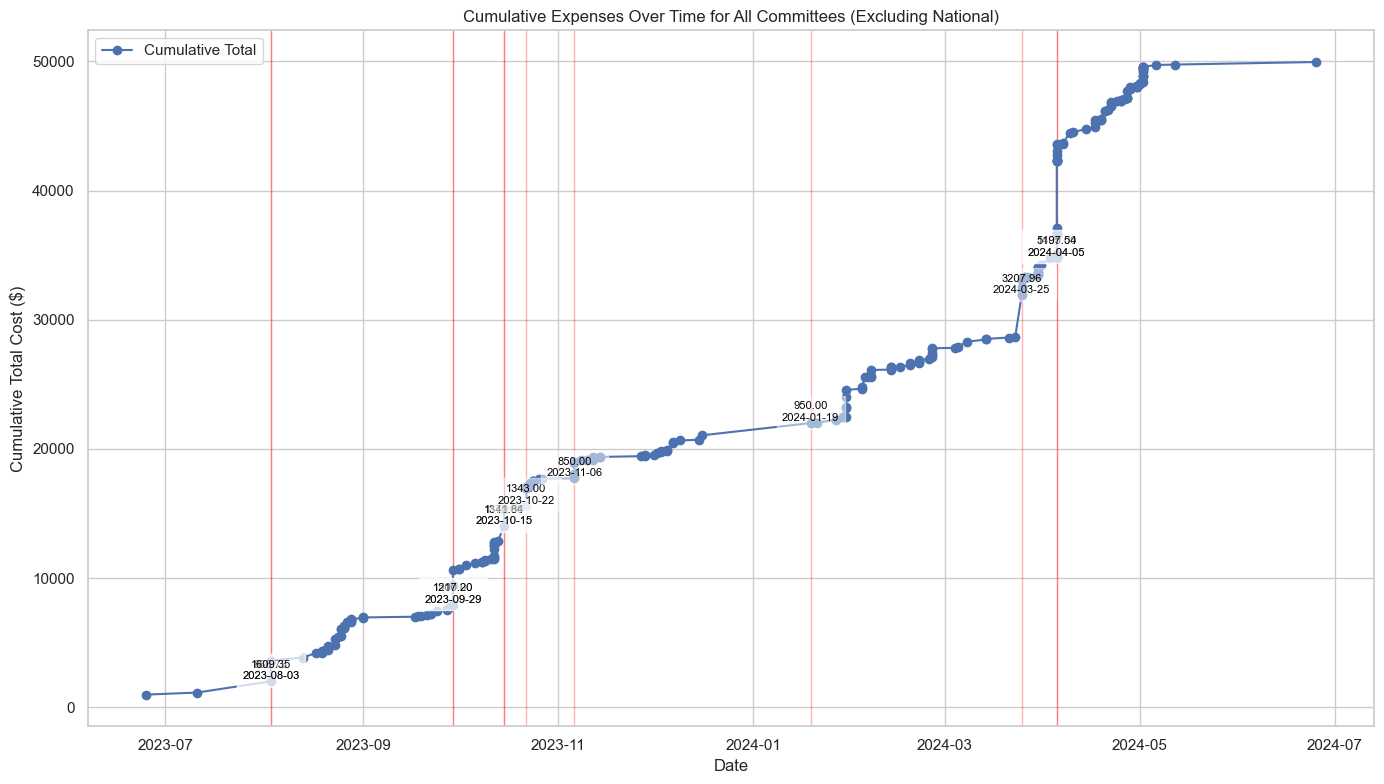

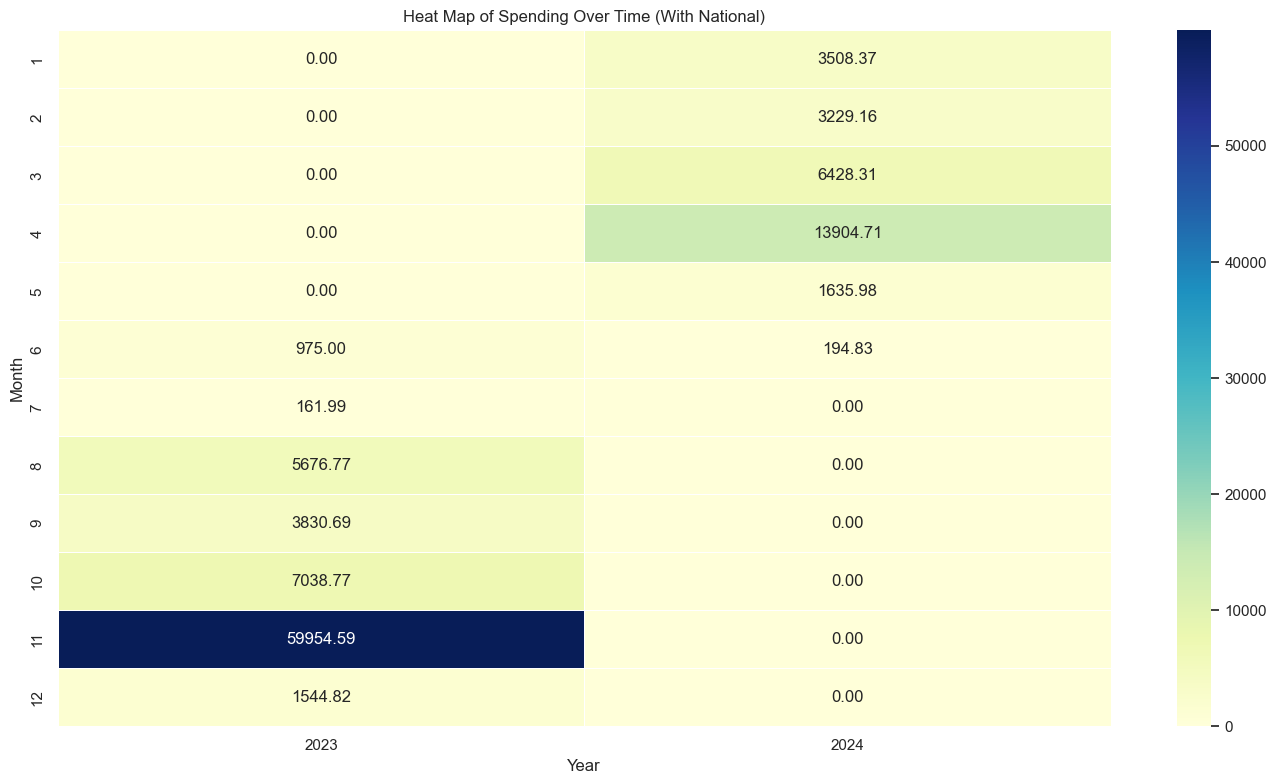

/var/folders/74/cvmwycsj1ns2d2dfd64v4l8c0000gn/T/ipykernel_35115/2208605016.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_expenses['Date Input'] = pd.to_datetime(filtered_expenses['Date Input'])
/var/folders/74/cvmwycsj1ns2d2dfd64v4l8c0000gn/T/ipykernel_35115/2208605016.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_expenses['Year'] = filtered_expenses['Date Input'].dt.year
/var/folders/74/cvmwycsj1ns2d2dfd64v4l8c0000gn/T/ipykernel_35115/2208605016.py:183: SettingWithCopyWar

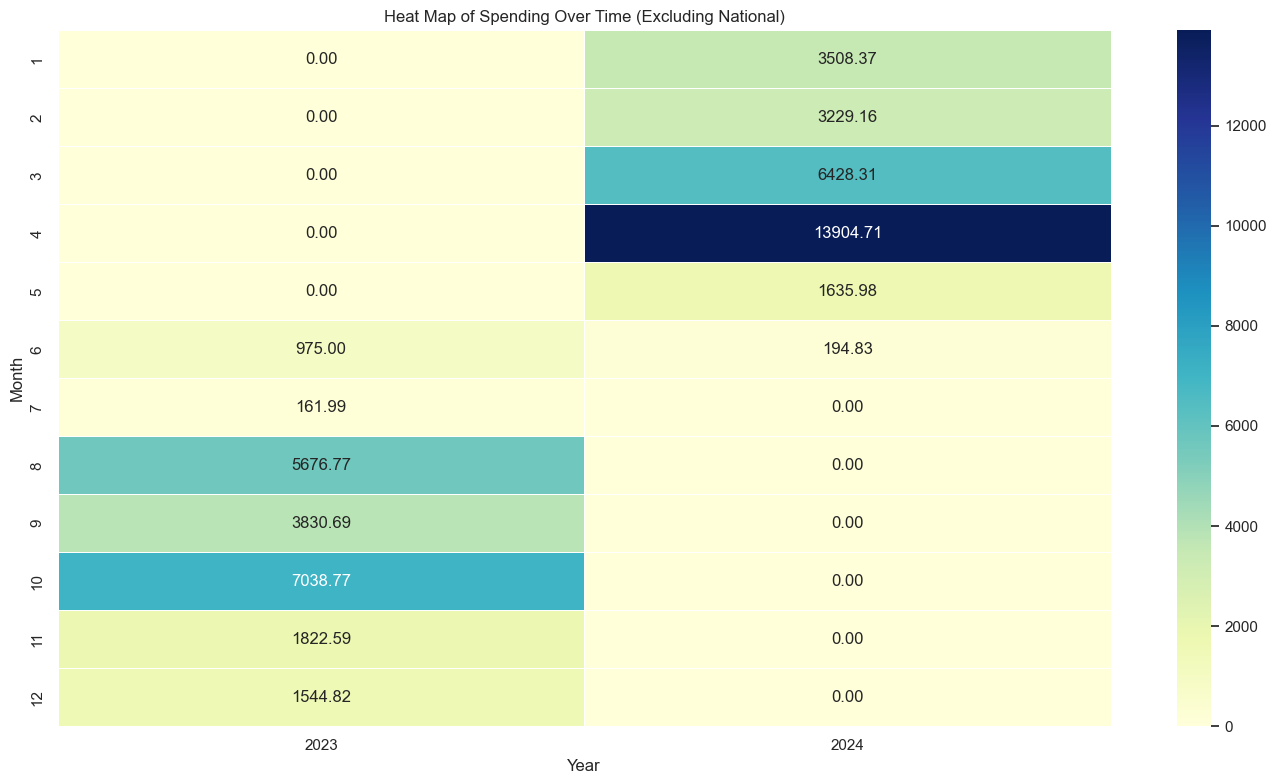

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

shpe_blue = '#0033A0'
shpe_orange = '#FF6D00'
shpe_light_blue = '#00A3E0'

sns.set(style="whitegrid")

pastel_colors = sns.color_palette("pastel", len(committee_totals))

committee_totals = committee_totals.sort_values(by='Total Cost', ascending=False)

plt.figure(figsize=(10, 8))
plt.pie(committee_totals['Total Cost'], colors=pastel_colors, startangle=140)
plt.title('Spending Distribution Among Committees')
plt.axis('equal')

labels = [f'{c} ({p:.1f}%)' for c, p in zip(committee_totals['Committee'], (committee_totals['Total Cost'] / committee_totals['Total Cost'].sum()) * 100)]
plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('committee_spending_distribution.png')
plt.show()

committee = input("Please enter the committee name: ").strip().lower()
committee_expenses = expenses_df_sorted[expenses_df_sorted['Commitee'] == committee]

fall_expenses = committee_expenses[(committee_expenses['Date Input'].apply(lambda x: x.month in range(8, 12)))]
spring_expenses = committee_expenses[(committee_expenses['Date Input'].apply(lambda x: x.month in range(1, 8)))]

total_fall_expenses = fall_expenses['Total Cost'].sum()
total_spring_expenses = spring_expenses['Total Cost'].sum()

fall_difference = fall_budget - total_fall_expenses
spring_difference = spring_budget - total_spring_expenses

fall_status = "Underspent" if fall_difference >= 0 else "Overspent"
spring_status = "Underspent" if spring_difference >= 0 else "Overspent"

fall_large_purchases = fall_expenses[fall_expenses['Total Cost'] > 500]
spring_large_purchases = spring_expenses[spring_expenses['Total Cost'] > 500]

fall_utilized = (total_fall_expenses / fall_budget) * 100 if fall_budget != 0 else 0
spring_utilized = (total_spring_expenses / spring_budget) * 100 if spring_budget != 0 else 0

plt.figure(figsize=(10, 8))
budgets = {'Fall Budget': fall_budget, 'Spring Budget': spring_budget}
actual_spending = {'Fall Expenses': total_fall_expenses, 'Spring Expenses': total_spring_expenses}
percent_utilized = {'Fall Utilized (%)': fall_utilized, 'Spring Utilized (%)': spring_utilized}

labels = list(budgets.keys())
budget_values = list(budgets.values())
spending_values = list(actual_spending.values())
utilized_values = list(percent_utilized.values())

x = range(len(labels))  

plt.bar(x, budget_values, width=0.4, label='Budget', color=shpe_orange, align='center')
plt.bar(x, spending_values, width=0.4, label='Actual Spending', color=shpe_blue, align='edge')
for i, v in enumerate(utilized_values):
    plt.text(i - 0.15, budget_values[i] + 50, f'{v:.1f}%', color='black', fontweight='bold')
plt.xlabel('Semester')
plt.ylabel('Amount ($)')
plt.title(f'Actual Spending vs. Budget for {committee.capitalize()} Committee')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.savefig('actual_spending_vs_budget.png')
plt.show()

print(f"Committee: {committee}")

print("\nFall Semester:")
print(f"Total Expenses: {total_fall_expenses:.2f}")
print(f"Budget: {fall_budget:.2f}")
print(f"Difference: {fall_difference:.2f} ({fall_status})")
print("Large Purchases:")
for purchase in fall_large_purchases.itertuples():
    print(f"- Description: {purchase.Description}, Total Cost: {purchase._3:.2f}, Comments: {purchase.Comments}")

print("\nSpring Semester:")
print(f"Total Expenses: {total_spring_expenses:.2f}")
print(f"Budget: {spring_budget:.2f}")
print(f"Difference: {spring_difference:.2f} ({spring_status})")
print("Large Purchases:")
for purchase in spring_large_purchases.itertuples():
    print(f"- Description: {purchase.Description}, Total Cost: {purchase._3:.2f}, Comments: {purchase.Comments}")
import matplotlib.pyplot as plt
import pandas as pd
def plot_cumulative_expenses_over_time(expenses_df_sorted):
    filtered_expenses = expenses_df_sorted
    
    filtered_expenses = filtered_expenses.sort_values(by='Date Input')
    
    filtered_expenses['Cumulative Total'] = filtered_expenses['Total Cost'].cumsum()
    
    plt.figure(figsize=(14, 8))
    plt.plot(filtered_expenses['Date Input'], filtered_expenses['Cumulative Total'], marker='o', color='b', label='Cumulative Total')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Total Cost ($)')
    plt.title('Cumulative Expenses Over Time for All Committees (With National)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_cumulative_expenses_over_time(expenses_df_sorted)

def plot_cumulative_expenses_over_time(expenses_df_sorted):
    filtered_expenses = expenses_df_sorted[expenses_df_sorted['Commitee'].str.lower() != 'nationals']
    
    filtered_expenses = filtered_expenses.sort_values(by='Date Input')
    
    filtered_expenses['Cumulative Total'] = filtered_expenses['Total Cost'].cumsum()
    
    plt.figure(figsize=(14, 8))
    plt.plot(filtered_expenses['Date Input'], filtered_expenses['Cumulative Total'], marker='o', color='b', label='Cumulative Total')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Total Cost ($)')
    plt.title('Cumulative Expenses Over Time for All Committees (Excluding National)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_cumulative_expenses_over_time(expenses_df_sorted)

def plot_cumulative_expenses_over_time(expenses_df_sorted, exclude_national=False, threshold_quantile=0.75):
    if exclude_national:
        filtered_expenses = expenses_df_sorted[expenses_df_sorted['Commitee'].str.lower() != 'nationals']
    else:
        filtered_expenses = expenses_df_sorted

    filtered_expenses = filtered_expenses.sort_values(by='Date Input')

    filtered_expenses['Cumulative Total'] = filtered_expenses['Total Cost'].cumsum()

    filtered_expenses['Daily Change'] = filtered_expenses['Cumulative Total'].diff().fillna(0)

    high_threshold = filtered_expenses['Daily Change'].quantile(threshold_quantile)  # Custom quantile threshold

    high_change_data = filtered_expenses[filtered_expenses['Daily Change'] > high_threshold]
    print("Areas with high derivatives:")
    for _, row in high_change_data.iterrows():
        print(f"Date: {row['Date Input'].strftime('%Y-%m-%d')}, Change: {row['Daily Change']:.2f}, Comment: {row['Description']}")

    plt.figure(figsize=(14, 8))
    plt.plot(filtered_expenses['Date Input'], filtered_expenses['Cumulative Total'], marker='o', color='b', label='Cumulative Total')

    for date, change in zip(high_change_data['Date Input'], high_change_data['Daily Change']):
        plt.axvspan(date - pd.Timedelta(days=0.5), date + pd.Timedelta(days=0.5), color='red', alpha=0.3)
        plt.text(date, filtered_expenses.loc[filtered_expenses['Date Input'] == date, 'Cumulative Total'].values[0], 
                 f'{change:.2f}\n{date.strftime("%Y-%m-%d")}', 
                 color='black', ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

    plt.xlabel('Date')
    plt.ylabel('Cumulative Total Cost ($)')
    if exclude_national:
        plt.title('Cumulative Expenses Over Time for All Committees (Excluding National)')
    else:
        plt.title('Cumulative Expenses Over Time for All Committees (With National)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_cumulative_expenses_over_time(expenses_df_sorted, exclude_national=False, threshold_quantile=0.95)
plot_cumulative_expenses_over_time(expenses_df_sorted, exclude_national=True, threshold_quantile=0.95)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def create_spending_heat_map(expenses_df_sorted, exclude_national=False):
    if exclude_national:
        filtered_expenses = expenses_df_sorted[expenses_df_sorted['Commitee'].str.lower() != 'nationals']
    else:
        filtered_expenses = expenses_df_sorted

    filtered_expenses['Date Input'] = pd.to_datetime(filtered_expenses['Date Input'])

    filtered_expenses['Year'] = filtered_expenses['Date Input'].dt.year
    filtered_expenses['Month'] = filtered_expenses['Date Input'].dt.month

    aggregated_expenses = filtered_expenses.groupby(['Year', 'Month']).agg({'Total Cost': 'sum'}).reset_index()

    pivot_table = aggregated_expenses.pivot_table(index='Month', columns='Year', values='Total Cost', fill_value=0)

    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
    plt.xlabel('Year')
    plt.ylabel('Month')
    if exclude_national:
        plt.title('Heat Map of Spending Over Time (Excluding National)')
    else:
        plt.title('Heat Map of Spending Over Time (With National)')
    plt.tight_layout()
    plt.show()

create_spending_heat_map(expenses_df_sorted, exclude_national=False)
create_spending_heat_map(expenses_df_sorted, exclude_national=True)